### method1 ###

In [33]:
import sympy as sp

# 使用符号计算特征方程的根
lam = sp.symbols('lam')
characteristic_eq = -3 * lam**3 - 4 * lam**2 + 2 * lam + 1

# 求解特征方程的根
lambda_roots_symbolic = sp.solve(characteristic_eq, lam)
print("特征方程的符号解：", lambda_roots_symbolic)

特征方程的符号解： [-1/3, -1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2]


In [37]:
from scipy.optimize import fsolve

# 解的通用形式
def y(t, C1, C2, C3):
    return C1 * np.exp(-t/3) + C2 * np.exp((-1/2 + np.sqrt(5)/2) * t) + C3 * np.exp((-1/2 - np.sqrt(5)/2) * t)

def y_prime(t, C1, C2, C3):
    return C1 * (-1/3) * np.exp(-t/3) + C2 * (-1/2 + np.sqrt(5)/2) * np.exp((-1/2 + np.sqrt(5)/2) * t) + \
           C3 * (-1/2 - np.sqrt(5)/2) * np.exp((-1/2 - np.sqrt(5)/2) * t)

# 计算 y''(t)
def y_double_prime(t, C1, C2, C3):
    return C1 * (1/9) * np.exp(-t/3) + C2 * ((-1/2 + np.sqrt(5)/2)**2) * np.exp((-1/2 + np.sqrt(5)/2) * t) + \
           C3 * ((-1/2 - np.sqrt(5)/2)**2) * np.exp((-1/2 - np.sqrt(5)/2) * t)

# 根据初始条件 y(0) = 1, y'(0) = 0, y''(0) = 0 求解常数 C1, C2, C3
def solve_constants():
    # 定义方程组
    def equations(vars):
        C1, C2, C3 = vars
        # 初始条件 y(0) = 1, y'(0) = 0, y''(0) = 0
        eq1 = y(0, C1, C2, C3) - 1  # y(0) = 1
        eq2 = y_prime(0, C1, C2, C3)  # y'(0) = 0
        eq3 = y_double_prime(0, C1, C2, C3)  # y''(0) = 0
        return [eq1, eq2, eq3]

    # 使用 fsolve 求解常数 C1, C2, C3
    initial_guess = [1, 1, 1]  # 初始猜测
    constants = fsolve(equations, initial_guess)
    return constants

# 求解常数
constants = solve_constants()
print("常数 C1, C2, C3：", constants)

# 使用常数得到最终解
t_vals = np.linspace(0, 5, 200)
y_vals = y(t_vals, *constants)  # 用解的常数替代


常数 C1, C2, C3： [ 0.81818182  0.25353222 -0.07171403]


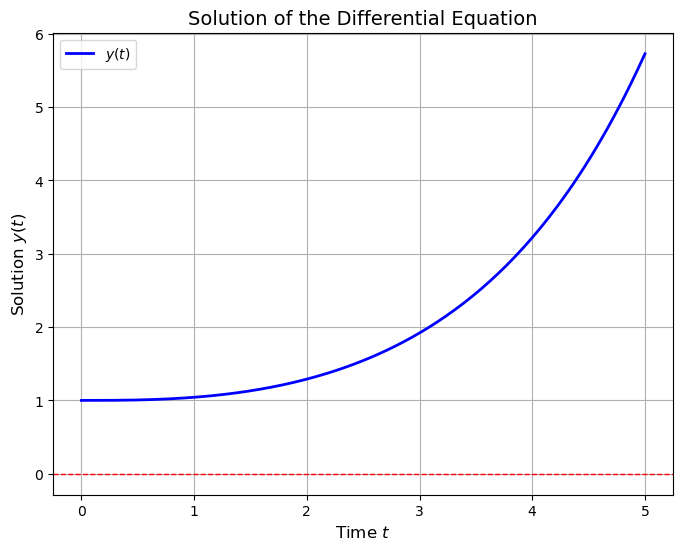

In [39]:
# 绘图
plt.figure(figsize=(8, 6))
plt.plot(t_vals, y_vals, label=r"$y(t)$", color="b", linewidth=2)
plt.axhline(0, color="r", linestyle="--", linewidth=1)  # 添加y=0的水平线
plt.title("Solution of the Differential Equation", fontsize=14)
plt.xlabel("Time $t$", fontsize=12)
plt.ylabel("Solution $y(t)$", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
###

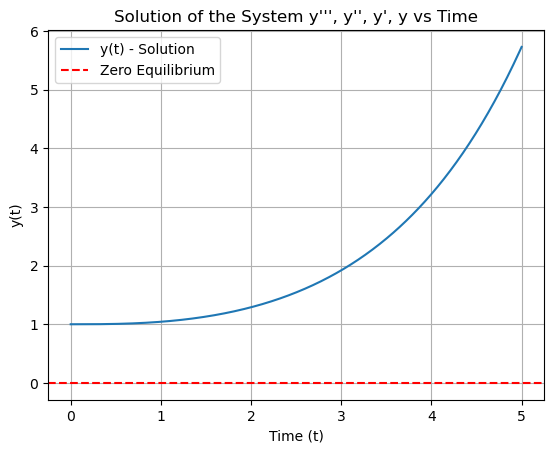

In [31]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# 系统矩阵 A
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [1/3, 2/3, -4/3]])

# 初始条件
x0 = np.array([1, 0, 0])  # 初始条件 y(0)=1, y'(0)=0, y''(0)=0

# 时间范围
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# 计算矩阵指数 e^(At) 并求解系统
def solve_system(A, x0, t_eval):
    solutions = []
    for t in t_eval:
        # 计算矩阵指数 e^(At)
        exp_At = expm(A * t)
        # 计算解 y(t) = e^(At) * x0
        x_t = np.dot(exp_At, x0)
        solutions.append(x_t[0])  # 只关心 y(t)，即 x_t[0]
    return np.array(solutions)

# 计算解
y_t = solve_system(A, x0, t_eval)

# 绘制结果
plt.plot(t_eval, y_t, label="y(t) - Solution")
plt.axhline(0, color='r', linestyle='--', label="Zero Equilibrium")
plt.title("Solution of the System y''', y'', y', y vs Time")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Matrix
from scipy.linalg import eigvals
from collections import Counter

In [4]:
# 系统矩阵 A
A = Matrix([[0, 1, 0],
              [0, 0, 1],
              [1/3, 2/3, -4/3]])

In [6]:
P,J=A.jordan_form()

In [8]:
J

Matrix([
[-0.333333333333333,                 0,                 0],
[                 0, 0.618033988749895,                 0],
[                 0,                 0, -1.61803398874989]])

In [10]:
P

Matrix([
[ 9.0, 2.61803398874989,  0.381966011250105],
[-3.0, 1.61803398874989, -0.618033988749895],
[ 1.0,              1.0,                1.0]])

In [12]:
# 定义矩阵 A
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [1/3, 2/3, -4/3]],dtype=float)

# 计算矩阵的实数特征值
eigenvalues = eigvals(A)
# 只考虑实数特征值
real_eigenvalues = eigenvalues[np.isreal(eigenvalues)].real  # 提取实数特征值
# 获取唯一特征值
unique_eigenvalues = np.unique(np.round(real_eigenvalues, decimals=1))  # 对特征值进行四舍五入，以避免精度问题
print("唯一特征值:", unique_eigenvalues)

唯一特征值: [-1.6 -0.3  0.6]


In [14]:
# 对特征值进行四舍五入（保留1位小数），并确保键是实数
eigenvalues_rounded = np.round(np.real(eigenvalues), 1)
# 使用 Counter 统计每个特征值的出现次数，得到代数重数
element_counts = Counter(eigenvalues_rounded)
# 将计数结果存储为字典，键为特征值（保留1位小数），值为出现次数（即代数重数）
algebraic_multiplicities = {key: count for key, count in element_counts.items()}
# 输出代数重数
print("代数重数:", algebraic_multiplicities)
# 构建若尔当块
def jordan_block(lambda_val, size):
    """
    创建一个给定特征值 lambda_val 和大小 size 的若尔当块
    """
    block = np.eye(size) * lambda_val  # 对角线是 lambda_val
    for i in range(size - 1):
        block[i, i + 1] = 1  # 上三角部分为 1
    return block

代数重数: {-1.6: 1, -0.3: 1, 0.6: 1}


In [16]:
E = jordan_block(-1.6, 1)
E

array([[-1.6]])

In [18]:
def construct_jordan_matrix():
    """
    根据特征值和几何重数构造若尔当矩阵
    """
    # 创建若尔当矩阵
    jordan_blocks = []
    

    E = jordan_block(-1.6, 1)
    B = jordan_block(-0.3, 1)
    C = jordan_block(0.6, 1)
    
    # 使用 np.block 拼接矩阵
    jordan_matrix = np.block([
        [E, np.zeros((1, 2))],    
        [np.zeros((1,1)), B,np.zeros((1,1))],
        [np.zeros((1,2)),C]])
    
    return jordan_matrix

# 构造若尔当矩阵
J = construct_jordan_matrix()
print("若尔当矩阵 J:")
print(J)


若尔当矩阵 J:
[[-1.6  0.   0. ]
 [ 0.  -0.3  0. ]
 [ 0.   0.   0.6]]


In [20]:
def jordan_exp_matrix(t):
    return np.diag(np.exp(np.diag(J) * t))

print("矩阵 e^(Jt) 为：")
jordan_exp_matrix(2)

矩阵 e^(Jt) 为：


array([[0.0407622 , 0.        , 0.        ],
       [0.        , 0.54881164, 0.        ],
       [0.        , 0.        , 3.32011692]])

In [29]:
# 初始条件
x0 = np.array([1, 0, 0])  # 初始条件 y(0)=1, y'(0)=0, y''(0)=0

# 时间范围
t_values = np.linspace(0, 5, 100)

# 存储每个时间点的解向量
y_t_all = []

# 计算每个时间点的解
for t in t_values:
    # 计算若尔当矩阵指数 e^(t * J)
    eJt = jordan_exp_matrix(t)
    
    # 计算 e^(At) 
    S = P 
    eAt =  S * eJt * S.inv()  # 计算 e^(At)
    
    # 计算解向量
    y_t = np.dot(eAt, x0)